In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
name=[]
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
wind=[] 

# Loop through the list of cities and perform a request for data on each

count=1 # Set counter to start value 1 for printouts of the current set count.

for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                             
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            print(city + ' city not found. Skipping...')     
        count=count+1

Processing Record 1 of 630 | rikitea
Processing Record 2 of 630 | castro
Processing Record 3 of 630 | vaini
Processing Record 4 of 630 | dhidhdhoo
Processing Record 5 of 630 | khatanga
Processing Record 6 of 630 | nichinan
Processing Record 7 of 630 | busselton
Processing Record 8 of 630 | rocha
Processing Record 9 of 630 | leningradskiy
Processing Record 10 of 630 | sioux lookout
Processing Record 11 of 630 | hermanus
Processing Record 12 of 630 | henties bay
Processing Record 13 of 630 | ribeira grande
Processing Record 14 of 630 | klaksvik
Processing Record 15 of 630 | tura
Processing Record 16 of 630 | saldanha
Processing Record 17 of 630 | taolanaro
taolanaro city not found. Skipping...
Processing Record 18 of 630 | ushuaia
Processing Record 19 of 630 | saint-joseph
Processing Record 20 of 630 | namibe
Processing Record 21 of 630 | praya
Processing Record 22 of 630 | yellowknife
Processing Record 23 of 630 | bathsheba
Processing Record 24 of 630 | souillac
Processing Record 25 of 

In [5]:
# Create DataFrame
weather_data = pd.DataFrame({
'city': name,
'cloud (%)': cloud,
'country': country,
'date': date,
'humidity (%)': humidity,
'lat': lat,
'lng': lng,
'max temp (F)': maxtemp,
'wind (mph)': wind,
})
weather_data

,city,cloud (%),country,date,humidity (%),lat,lng,max temp (F),wind (mph)
0,Rikitea,78,PF,1652046763,77,-23.1203,-134.9692,24.65,8.80
1,Castro,2,BR,1652046763,88,-24.7911,-50.0119,12.42,1.74
2,Vaini,20,TO,1652046763,69,-21.2000,-175.2000,26.09,4.12
3,Dhidhdhoo,94,MV,1652046764,70,6.8833,73.1000,29.38,7.96
4,Khatanga,45,RU,1652046764,96,71.9667,102.5000,-15.21,3.98
...,...,...,...,...,...,...,...,...,...
572,Arona,20,ES,1652046977,68,28.0996,-16.6810,17.12,8.23
573,Moyale,37,KE,1652046978,73,3.5167,39.0584,20.59,2.47
574,Denpasar,40,ID,1652046978,100,-8.6500,115.2167,25.81,0.51
575,Mahanoro,15,MG,1652046978,91,-19.9000,48.8000,22.36,2.05


In [6]:
#this plot is analyzing the

In [7]:
# Export the weather_data into .csv file path specified with output_data_file:
weather_data.to_csv("output\weather_data.csv")

# Display the data frame:
weather_data.head()

,city,cloud (%),country,date,humidity (%),lat,lng,max temp (F),wind (mph)
0,Rikitea,78,PF,1652046763,77,-23.1203,-134.9692,24.65,8.80
1,Castro,2,BR,1652046763,88,-24.7911,-50.0119,12.42,1.74
2,Vaini,20,TO,1652046763,69,-21.2000,-175.2000,26.09,4.12
3,Dhidhdhoo,94,MV,1652046764,70,6.8833,73.1000,29.38,7.96
4,Khatanga,45,RU,1652046764,96,71.9667,102.5000,-15.21,3.98


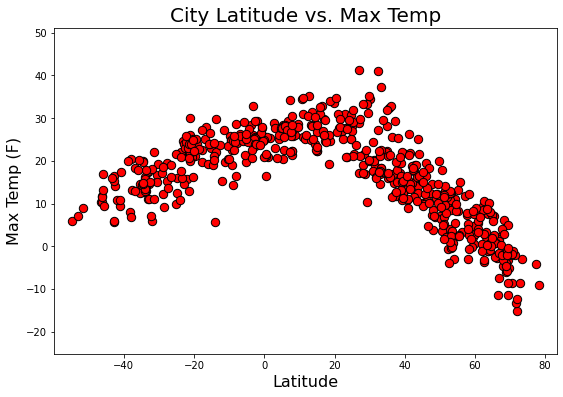

In [8]:
# Build a scatter plot for all cities vs max. temp.:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['lat'], weather_data['max temp (F)'], marker='o', edgecolors='black', color='red',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Max Temp', fontsize=20)
plt.ylabel('Max Temp (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['max temp (F)'])-10, max(weather_data['max temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['lat'])-5, max(weather_data['lat'])+5)

# Save the figure:
plt.savefig('output\Latitude vs. MaxTemp.png')

# Show plot:
plt.show()

In [9]:
#this plot is analyzing the relationship between latitude as the constant variable and mat temps as the dependant

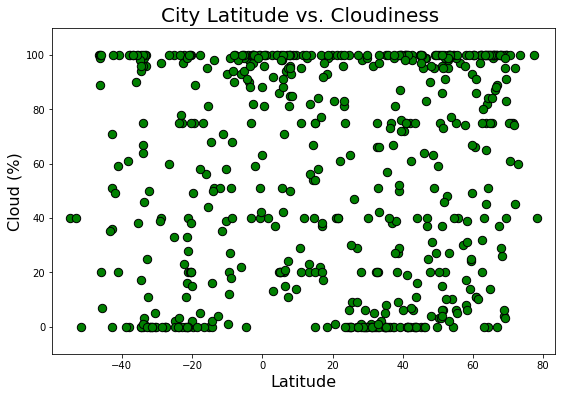

In [10]:
# Build a scatter plot for all cities vs cloudiness level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['lat'], weather_data['cloud (%)'], marker='o', edgecolors='black', color='green',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Cloudiness ', fontsize=20)
plt.ylabel('Cloud (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['cloud (%)'])-10, max(weather_data['cloud (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['lat'])-5, max(weather_data['lat'])+5)

# Save the figure
plt.savefig('output\City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

In [11]:
#this plot is analyzing the relationship between latitude as the constant variable and cludiness as the dependant

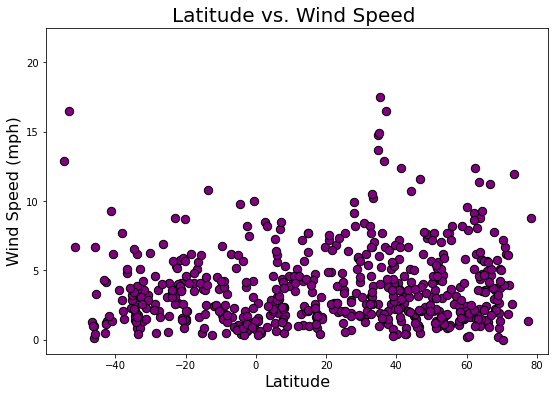

In [12]:
# Build a scatter plot for all cities vs wind speed:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['lat'], weather_data['wind (mph)'], marker='o', edgecolors='black', color='purple',  s=[70])

# Incorporate the other graph properties:
plt.title('Latitude vs. Wind Speed ', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['wind (mph)'])-1, max(weather_data['wind (mph)'])+5)

# Set the limits of the x axis:
plt.xlim(min(weather_data['lat'])-5, max(weather_data['lat'])+5)

# Save the figure
plt.savefig('output\Latitude vs. Wind.png')

# Show plot
plt.show()

In [13]:
#this plot is analyzing the relationship between latitude as the constant variable and wind speeds as the dependant

In [14]:
#LINEAR REGRESSION

In [15]:
# Create new data frame for northern hemisphere (lat >= 0 degree):
weather_data_north = weather_data[weather_data['lat'] >= 0]

# Create new data frame for southern hemisphere (lat < 0 degree):
weather_data_south = weather_data[weather_data['lat'] < 0]


C:\Users\brian\AppData\Local\Temp/ipykernel_5064/2205688954.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values,y_values, marker='x', color='orange', s=[70], edgecolors='black')


The r-squared is: 0.75


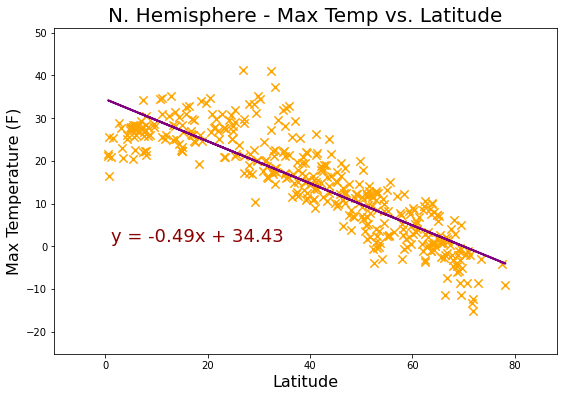

In [16]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['lat']
y_values = weather_data_north['max temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='x', color='orange', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'purple', linewidth=2)

# Incorporate the other graph properties:
plt.title('N. Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')

# Set the limits of the y axis:
plt.ylim(min(weather_data['max temp (F)'])-10, max(weather_data['max temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(-10, max(weather_data['lat'])+10)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output\Reg Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

In [17]:
#negative coorelation 

The r-squared is: 0.59


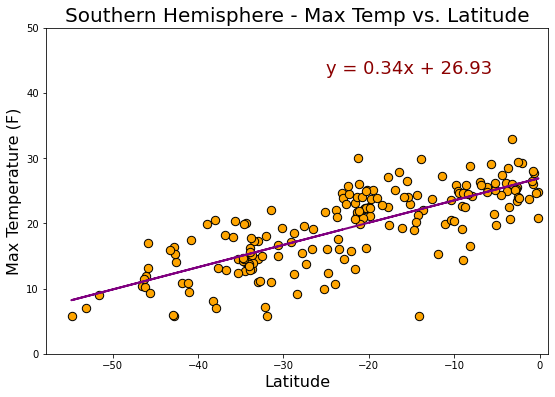

In [18]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['lat']
y_values = weather_data_south['max temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='orange', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'purple', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(0, 50)

# Set the limits of the x axis:
plt.xlim(min(weather_data['lat'])-3, +1)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output\Reg Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

In [19]:
#reasonbly strong positive coorelation

The r-squared is: 0.02


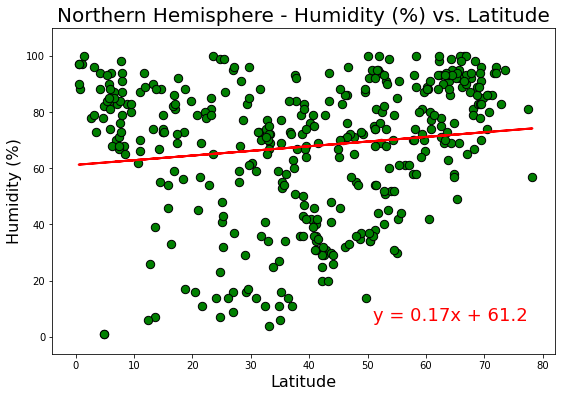

In [20]:
 # Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['lat']
y_values = weather_data_north['humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='green', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='red')

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output\Reg City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()


In [21]:
#.03 shows practically no cooreletion between lattitude and humidity

The r-squared is: 0.03


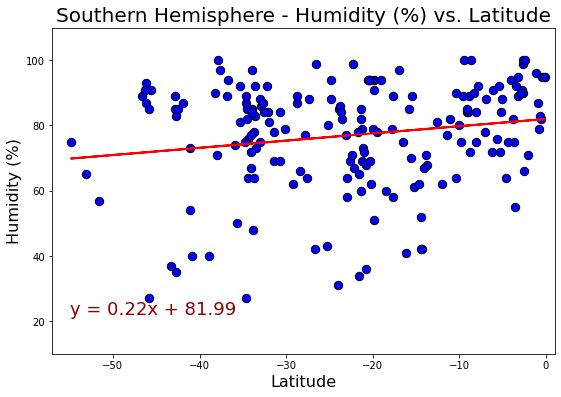

In [22]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['lat']
y_values = weather_data_south['humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Reg City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()


In [23]:
#.01 shows practically no cooreletion between lattitude and humidity

The r-squared is: 0.01


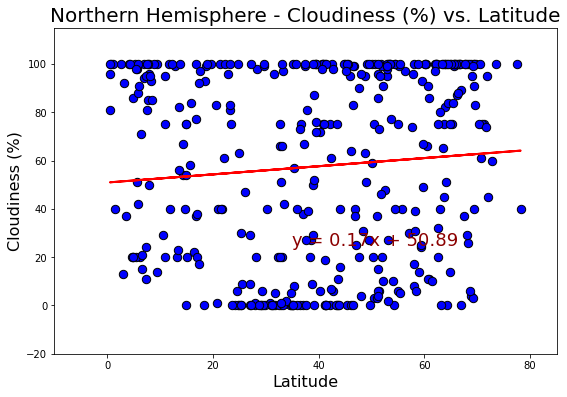

In [25]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['lat']
y_values = weather_data_north['cloud (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-20, 115)

# Set the limits of the x axis:
plt.xlim(-10, 85)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Reg City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

In [26]:
#no coorelation

The r-squared is: 0.03


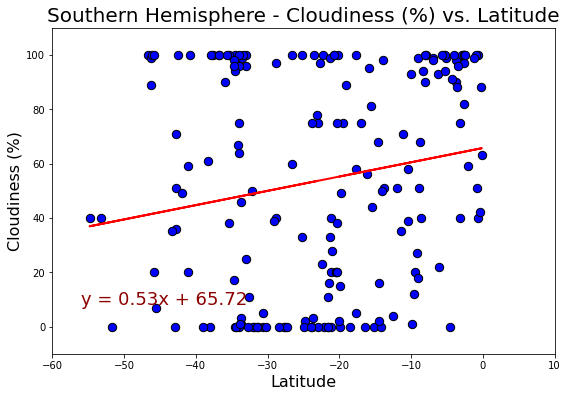

In [27]:
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['lat']
y_values = weather_data_south['cloud (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-10, 110)

# Set the limits of the x axis:
plt.xlim(-60, 10)


print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Reg City Latitude vs. Cloudiness South.png')

# Show plot:
plt.show()

In [28]:
#very little positive coorelation

The r-squared is: 0.0


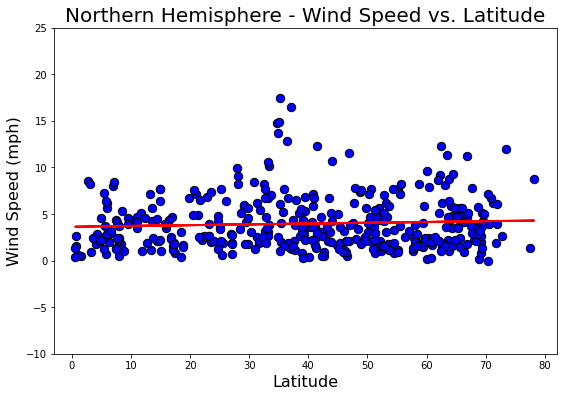

In [31]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['lat']
y_values = weather_data_north['wind (mph)']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='red')

# Set the limits of the y axis:
plt.ylim(-10, 25)

# Set the limits of the x axis:
plt.xlim(-3, 82)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output\Reg City Latitude vs. Wind North.png')

# Show plot:
plt.show()

In [32]:
# no coorelation

The r-squared is: 0.01


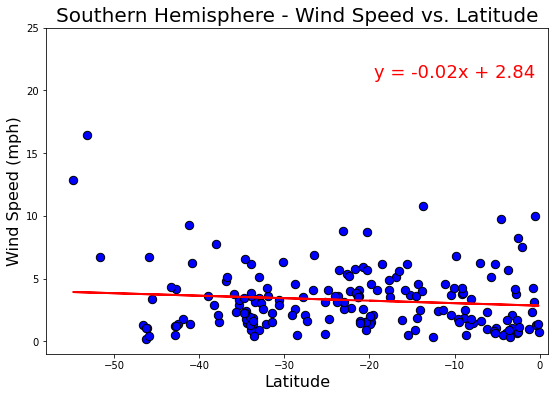

In [34]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['lat']
y_values = weather_data_south['wind (mph)']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='red')

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)


print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output\Reg City Latitude vs. Wind_South.png')

# Show plot:
plt.show()

In [ ]:
#negligable negative coorelation